<a href="https://colab.research.google.com/github/myllanes/ECGR4105M.Y/blob/main/Notebooks/11-NaiveGaussianBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem statement
Suppose we have the information regarding the social media users' gender, age, salary and whether they have purchased a product or not. We want to design a ML model that will predict whether a person will purchase a product or not from his gender, age and salary information.  

In [ ]:
!git clone https://github.com/Farah-Deeba-UNCC/Introduction-to-ML.git
data = pd.read_csv('Introduction-to-ML/Data/Social_Network_Ads.csv', na_values='*')
display(data)

fatal: destination path 'Introduction-to-ML' already exists and is not an empty directory.


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# In our dataset, we will consider Age and EstimatedSalary as Independent variables or features.
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [ ]:
# Now we will split our dataset into training and test data. Training data will be used to
# train a logistic model and test data will be used to validate our model.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)


In [ ]:
# Feature scaling to scale data between 0 and 1.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# Import Naive Gaussian Bayes and train the model on the training data

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Now predict the target for the test data
Y_pred = classifier.predict(X_test)

In [ ]:
# Performance evaluation: we can use confusion matrix to see the performance of the model

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[64,  4],
       [ 5, 27]])

Text(0.5, 427.9555555555555, 'Predicted Label')

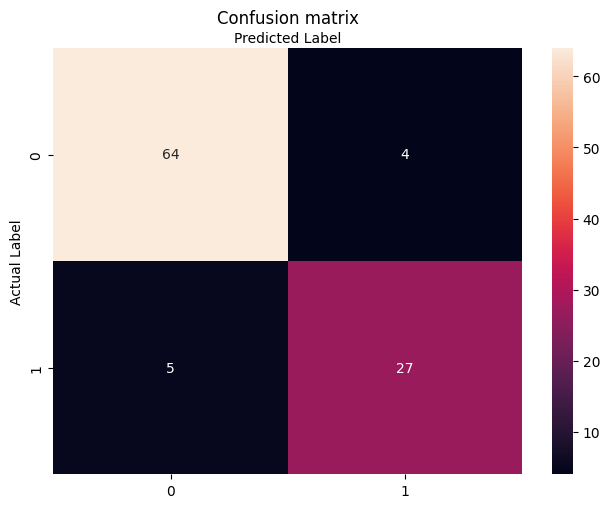

In [ ]:
# Let's visualize the confusion matrix using a heatmap
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
# Evaluate the classifier performance in terms of accuracy, precision and recall
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.91
Precision: 0.8709677419354839
Recall: 0.84375


<ipython-input-26-c00c23eadae5>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


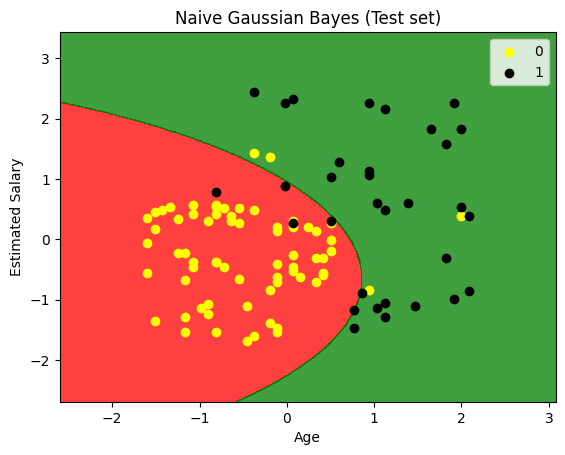

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'black'))(i), label = j)
plt.title('Naive Gaussian Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()